Here's a 5-step explanation of computer vision:

Image Acquisition: This is the process of capturing visual information, such as images and videos, and converting them into a format that can be processed by computers.

Image Pre-processing: This step involves cleaning and transforming raw images into a format that is suitable for analysis. This can include techniques such as cropping, resizing, normalizing and removing noise from images.

Feature Extraction: In this step, computers analyze images and extract relevant features, such as lines, edges, and shapes, which are used to make predictions and classifications.

Machine Learning: This step involves using algorithms, such as deep learning, to train computers to recognize patterns and make predictions based on the visual information they receive.

Object Recognition and Image Understanding: The final step involves using the information extracted in the previous steps to recognize objects, classify images, and make predictions about the content and context of visual data. This allows computers to understand and analyze images and videos in the same way that humans do.

In [34]:
from openml.datasets import get_dataset

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [35]:
fashion_mnist = get_dataset('Fashion-MNIST')


/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


In [36]:
fashion_mnist

OpenML Dataset
Name..........: Fashion-MNIST
Version.......: 1
Format........: ARFF
Upload Date...: 2017-12-20 13:28:27
Licence.......: Public
Download URL..: https://api.openml.org/data/v1/download/18238735/Fashion-MNIST.arff
OpenML URL....: https://www.openml.org/d/40996
# of features.: 785
# of instances: 70000

In [37]:
X, y, _, _ = fashion_mnist.get_data()


In [38]:
from sklearn.datasets import fetch_openml


In [39]:
mnist_fashion = fetch_openml('Fashion-MNIST', cache=True)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [40]:
mnist_fashion.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [41]:
print(mnist_fashion['DESCR'])


**Author**: Han Xiao, Kashif Rasul, Roland Vollgraf  
**Source**: [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  
**Please cite**: Han Xiao and Kashif Rasul and Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, arXiv, cs.LG/1708.07747  

Fashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. 

Raw data available at: https://github.com/zalandoresearch/fashion-mnist

### Target classes
Each training and test example is assigned to one of the following labels:
Label  Description  
0  T-shirt/top  
1  Trouser  
2  Pullover  
3  Dress  
4  

In [42]:
mnist_fashion['details']
mnist_fashion['url']

'https://www.openml.org/d/40996'

In [43]:
X = mnist_fashion['data']
y = mnist_fashion['target']

X.shape, y.shape

((70000, 784), (70000,))

In [44]:
classes = ['tshirt', 'trouser', 'pullover', 'dress','coat',
            'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [45]:
# visualize with 2x5 grid
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['figure.dpi'] = 100

digits = y.unique()
digits = [int(x) for x in digits]
digits.sort()
digits

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

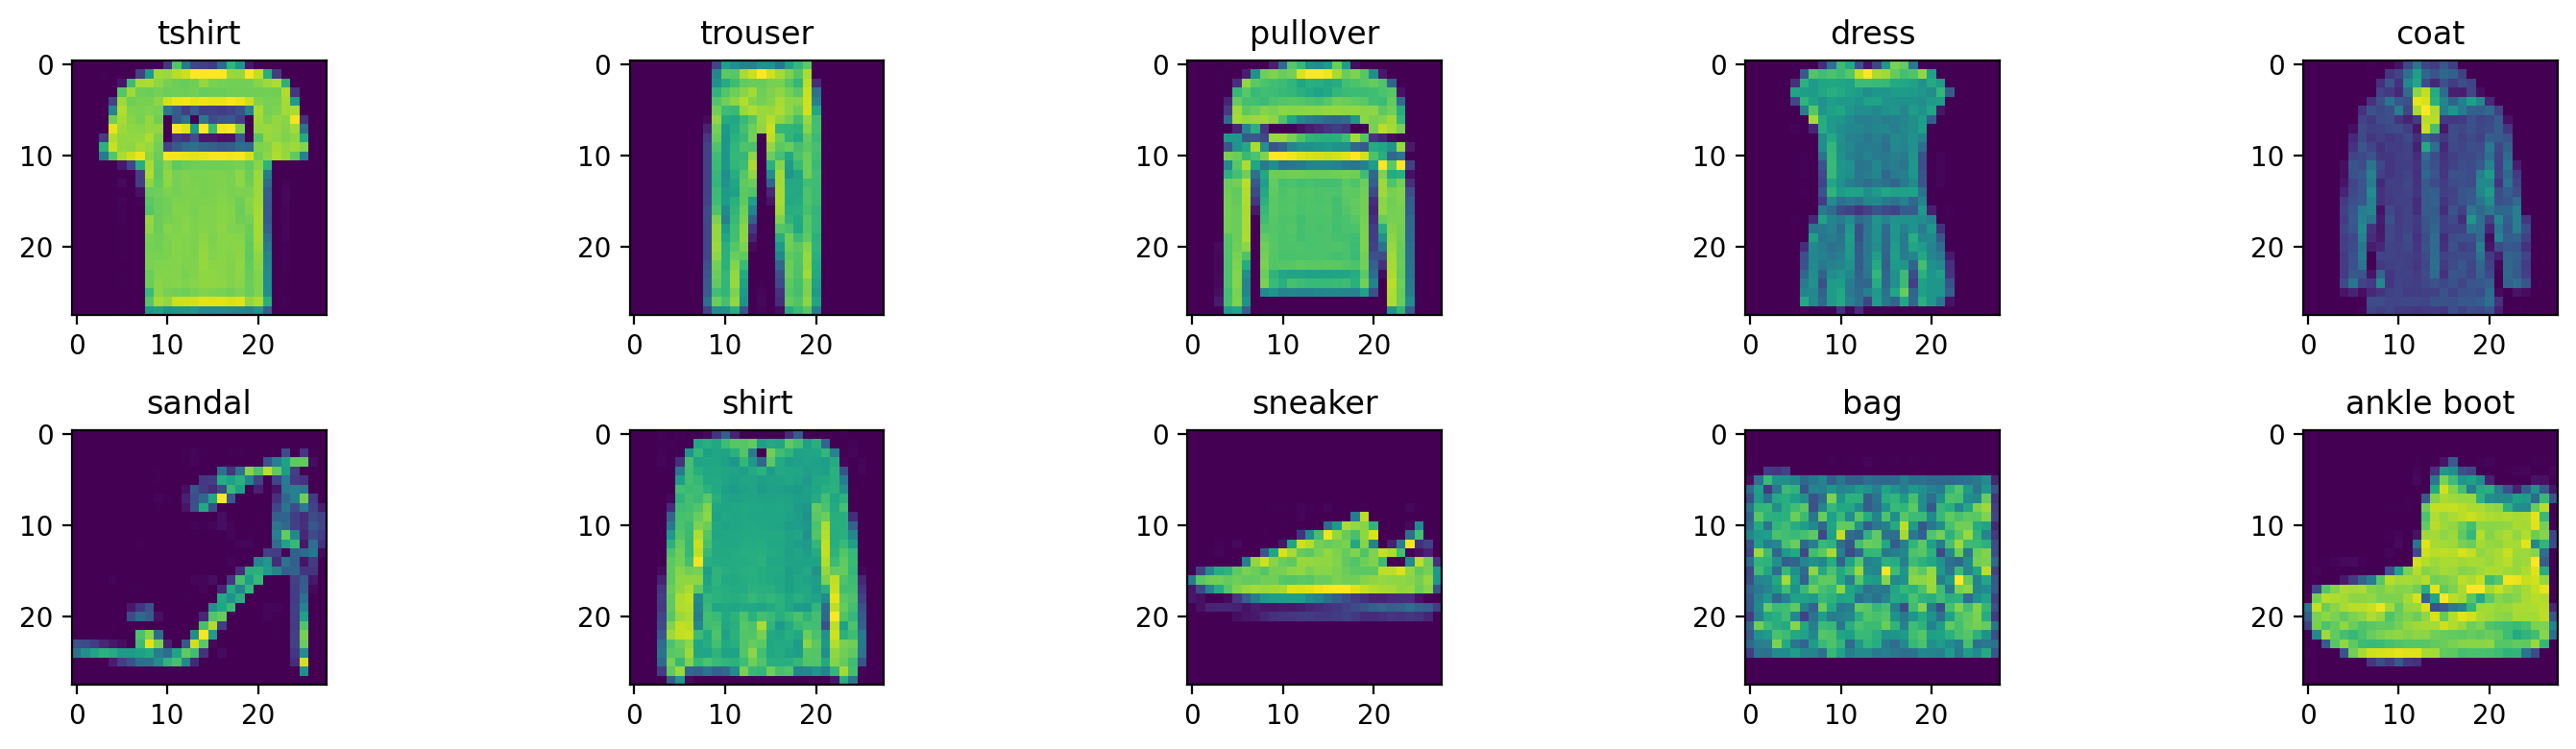

In [46]:
plt.rcParams['figure.figsize'] = (15,4)
plt.rcParams['figure.dpi'] = 200

for i in digits:
  plt.subplot(2,5, i+1)
  plt.imshow(X[y==str(i)].iloc[0].to_numpy().reshape(28,28))
  plt.title(classes[i])

plt.tight_layout()

In [ ]:
# Designing a Neural Network

In [47]:
from sklearn.model_selection import train_test_split


In [48]:
y = y.astype('int')
y

0        9
1        0
2        0
3        3
4        0
        ..
69995    9
69996    1
69997    8
69998    1
69999    5
Name: class, Length: 70000, dtype: int64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X/255, y, test_size=0.2, random_state=42,
                                                    stratify=y)

X_train.shape, X_test.shape

((56000, 784), (14000, 784))

In [50]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [51]:
def get_model():
  model = Sequential()
  model.add(Flatten(input_shape=(X.shape[1],)))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

In [52]:
model = get_model()


In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 128)               8320      
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


In [54]:
784*64+64, 64*128+128, 128*10+10


(50240, 8320, 1290)

In [55]:
model.layers


In [56]:
model.layers[2].name


'dense_5'

In [57]:
weight1 = model.layers[1].get_weights()


In [58]:
weight1[0].shape, weight1[1].shape


((784, 64), (64,))

In [59]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)
model.evaluate(X_test, y_test)

Epoch 1/10
1750/1750 [==============================] - 7s 3ms/step - loss: 0.5083 - accuracy: 0.8176
Epoch 2/10
1750/1750 [==============================] - 10s 5ms/step - loss: 0.3824 - accuracy: 0.8600
Epoch 3/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.3460 - accuracy: 0.8722
Epoch 4/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.3218 - accuracy: 0.8811
Epoch 5/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.3048 - accuracy: 0.8864
Epoch 6/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2903 - accuracy: 0.8924
Epoch 7/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2761 - accuracy: 0.8976
Epoch 8/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2663 - accuracy: 0.9003
Epoch 9/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.2564 - accuracy: 0.9037
Epoch 10/10
438/438 [==============================] - 1s 2ms/step - loss: 0.3209

[0.3208954632282257, 0.8847857117652893]

1/1 [==============================] - 0s 18ms/step


<ipython-input-60-85aec2e2e5f7>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = X_test[y==i].iloc[0].to_numpy()


1/1 [==============================] - 0s 16ms/step


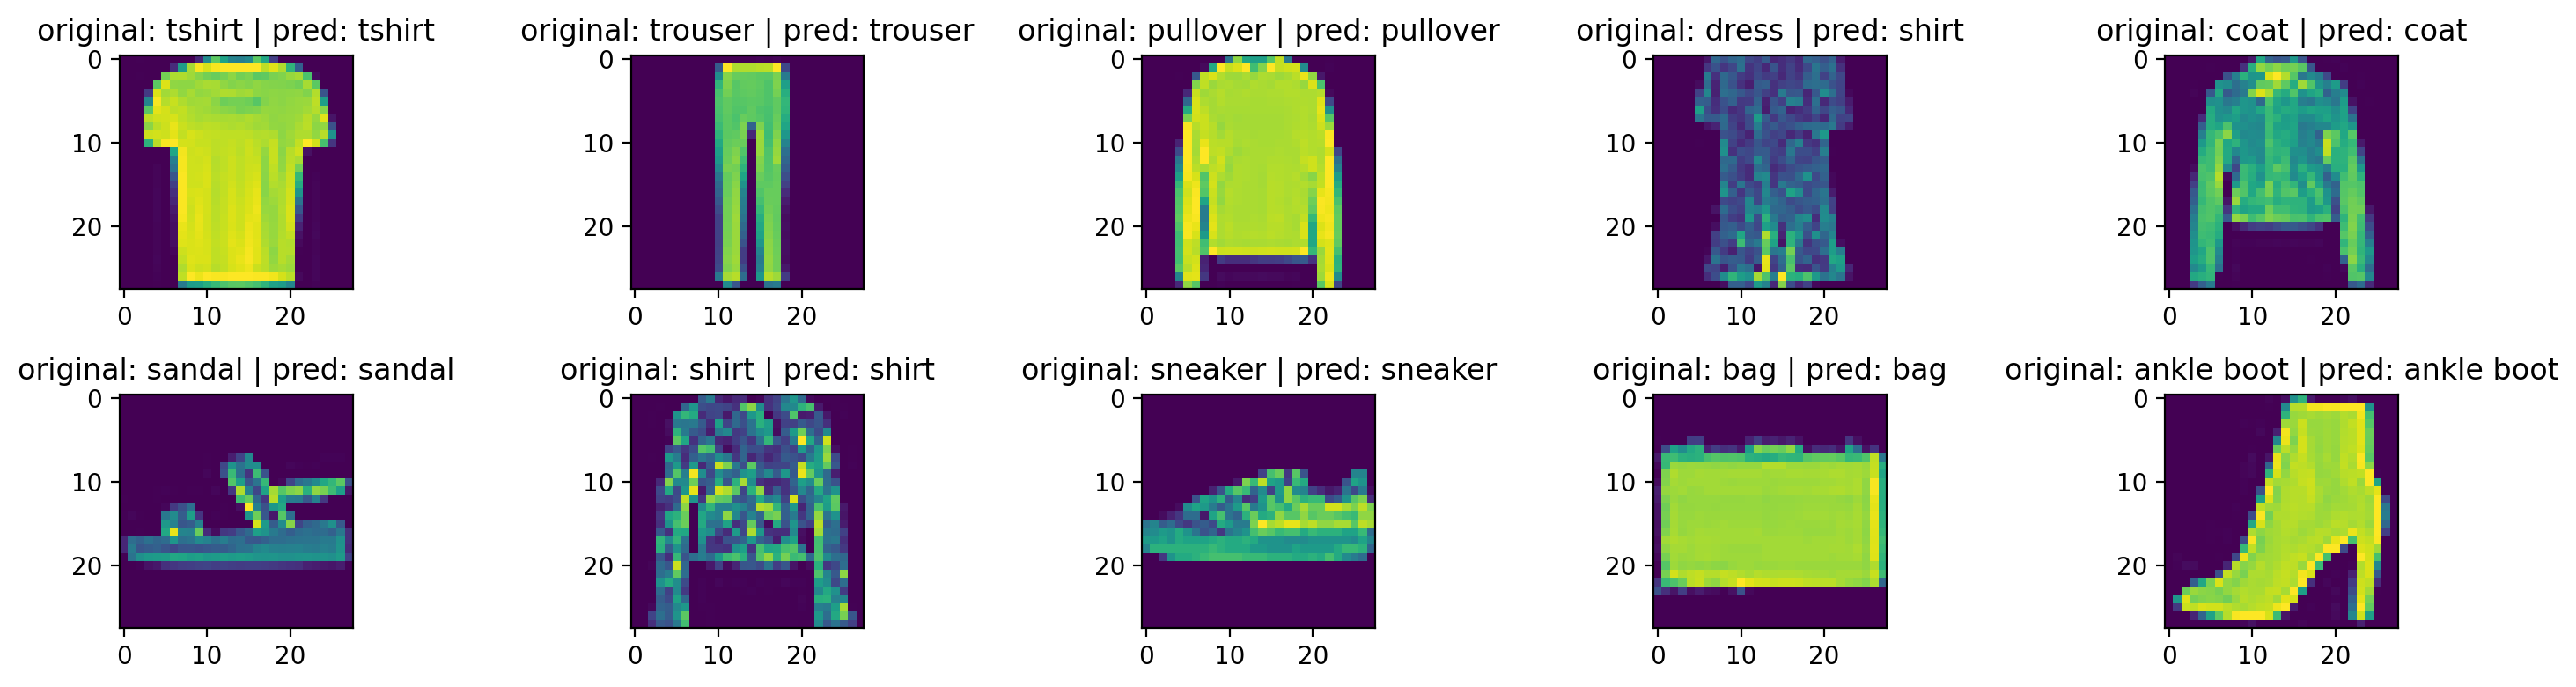

In [60]:
plt.rcParams['figure.figsize'] = (15,4)
plt.rcParams['figure.dpi'] = 200

for i in digits:
  plt.subplot(2,5, i+1)
  test = X_test[y==i].iloc[0].to_numpy()
  plt.imshow(test.reshape(28,28))

  pred = model.predict(test.reshape(1,784,))
  idx = np.argmax(pred[0])
  pred_class = classes[idx]

  plt.title('original: {} | pred: {}'.format(classes[i], pred_class))

plt.tight_layout()

In [61]:
pred = model.predict(test.reshape(1,784,))
idx = np.argmax(pred[0])
pred_class = classes[idx]
pred_class

1/1 [==============================] - 0s 26ms/step


'ankle boot'

In [62]:

pred[0]

array([2.05799223e-12, 2.00619469e-11, 5.25501391e-17, 5.26109422e-16,
       6.33722390e-20, 1.50044125e-05, 3.54541290e-17, 7.57747998e-08,
       1.35873721e-17, 9.99984860e-01], dtype=float32)

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
X_train = X_train/255
X_test = X_test/255

In [18]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [19]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [22]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 15s 6ms/step - loss: 0.2829 - accuracy: 0.9175 - val_loss: 0.1393 - val_accuracy: 0.9576
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1167 - accuracy: 0.9645 - val_loss: 0.1116 - val_accuracy: 0.9663
Epoch 3/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0813 - accuracy: 0.9753 - val_loss: 0.1018 - val_accuracy: 0.9684
Epoch 4/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0597 - accuracy: 0.9814 - val_loss: 0.1106 - val_accuracy: 0.9697
Epoch 5/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0475 - accuracy: 0.9847 - val_loss: 0.0961 - val_accuracy: 0.9735
Epoch 6/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0372 - accuracy: 0.9878 - val_loss: 0.0926 - val_accuracy: 0.9743
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0316 - accuracy: 0.9898 - val_loss: 0.1097 - val_accurac

In [23]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [24]:
y_pred = y_prob.argmax(axis=1)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9729

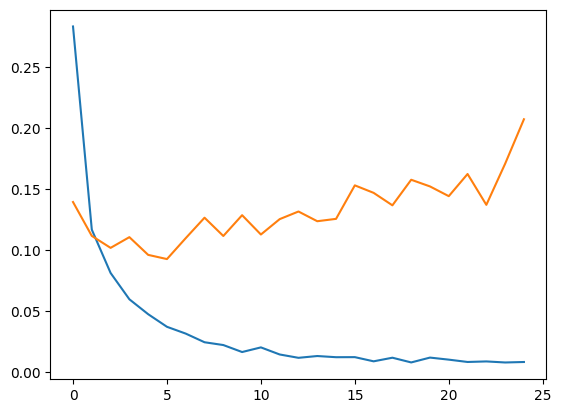

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

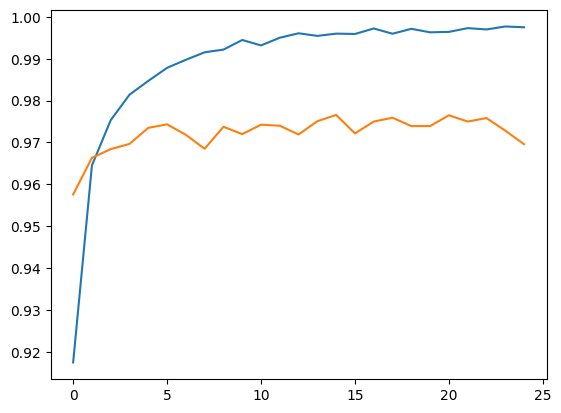

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

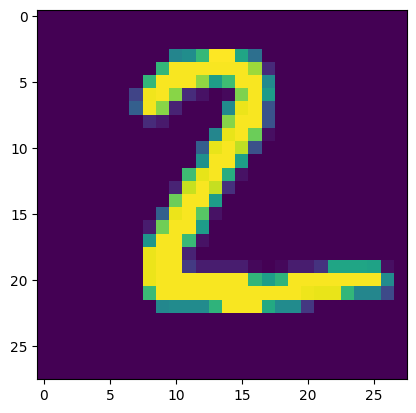

In [28]:
plt.imshow(X_test[1])

In [29]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 25ms/step


array([2])